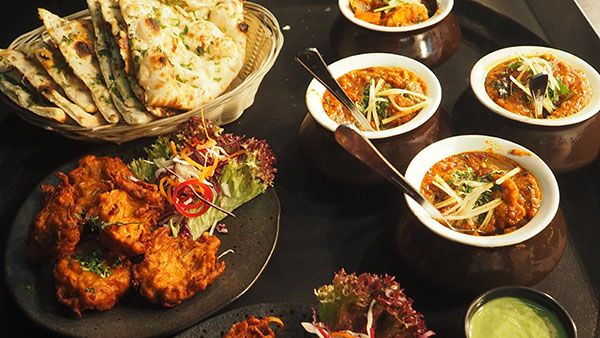

This data set will help you better undersatand the foods of india... You can get to know the following informations about Indian food : 

* Various Dishes 
* Their taste 
* Where they are found 
* How much time does it take to prepare the food 
* How many ingredients are needed 
etc...


# Table of Contents :

<a id = 'max 33'></a>

* [Import Section](#chapter1)
* [Data Cleaning Section](#chapter2)
* [Data Visualization](#chapter3)
    * [Dishes Word Art](#chapter4)
* [Proportion of Vegetarian and Non-Vegetarian dishes](#chapter5)
* [Proportion of States](#chapter6)
* [Proportion of Flavours](#chapter7)
* [Region wise no of foods](#chapter8)
    * [Region wise plots :](#chapter33)
        * [No of flavors around different rigions](#chapter30)
        * [No of veg and non veg dishes around different rigions](#chapter32)
        * [No of flavors around different rigions](#chapter31)
* [Preparation Time](#chapter9)
    * [State Word Art](#chapter10)
        * [Gujrat Infograph](#chapter11)
        * [Pujab Infograph](#chpater12)
        * [Maharashtra Infograph](#chapter13)
        * [Unknown State Infograph](#chapter14)
        * [West Bengal Infograph](#chapter15)
* [Top 10 snacks with longest Preparation time ](#chapter16)
    * [Snak Wort Art](#chapter17)
* [Top 10 Desserts with longest Preparation time](#chapter18)
    * [Dessert Word Art](#chapter19)
* [Main course Preparation time](#chapter20)
* [Top 10 Main Course with longest Preparation time](#chapter21)
    * [Main course Word Art](#chapter22)
* [Total ingredient Count](#chapter23)
* [Top 50 most used ingredient](#chapter24)
* [Ingredient count in dishes](#chapter27)
* [Time and total ingredient 3D](#chapter25)
* [Corelation Heatmap](#chapter26)

# Import Section <a class="anchor" id="chapter1"></a>

Here I'm gonna use pandas mainly.
* for visualizations I'm gonna use plotly express and 
* seaborn 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.patches as mpatches
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import seaborn as sns  
sns.set(color_codes = True)
sns.set(style="whitegrid")
import plotly.figure_factory as ff
from plotly.colors import n_colors

In [ ]:
df = pd.read_csv('indian_food.csv')

In [ ]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [ ]:
df.shape

(255, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [ ]:
df.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [ ]:
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

Here we can see that there is an undefined region along with a -1. So let's 1st convert them all into -1 and then try to find the region...

In [ ]:
df.region.unique()

array(['East', 'West', 'North', '-1', 'North East', 'South', 'Central',
       nan], dtype=object)

# Data Cleaning Section <a class="anchor" id="chapter2"></a>

In [ ]:
df.fillna(value= '-1', inplace = True)

These are the dishes from the undefined regions...

In [ ]:
c = []
for i in range(len(df)) : 
    if df.region.loc[i] == '-1' : 
        c.append(df.name.loc[i])
print(c)

['Kaju katli', 'Kheer', 'Laddu', 'Nankhatai', 'Khichdi', 'Kulfi falooda', 'Lauki ki subji', 'Pani puri', 'Panjeeri', 'Papad', 'Samosa', 'Upma', 'Brown Rice', 'Red Rice']


I specifically don't know where are these dishes from so I have marked them as unknown...
* If you know the region then do let me know in the comments thus I could update the region...

In [ ]:
df.region.replace(['-1'], 'unknown', regex = True, inplace = True)

Let's add another column to find the total ingredients used in each dishes...

In [ ]:
l = []
for i in range(len(df)) : 
    y = df.ingredients.loc[i]
    y_ = y.split(sep = ',')
    l.append(len(y_))
df['total_ingredients'] = pd.Series(l)

There are some unknown flavors too...

In [ ]:
flavor = []
for i in range(len(df)) : 
    if df.flavor_profile.loc[i] == '-1' : 
        flavor.append(df.name.loc[i])
flavor

['Chapati',
 'Naan',
 'Rongi',
 'Kanji',
 'Pachadi',
 'Paniyaram',
 'Paruppu sadam',
 'Puli sadam',
 'Puttu',
 'Sandige',
 'Sevai',
 'Thayir sadam',
 'Theeyal',
 'Bhakri',
 'Copra paak',
 'Dahi vada',
 'Dalithoy',
 'Kansar',
 'Farsi Puri',
 'Khar',
 'Luchi',
 'Bengena Pitika',
 'Bilahi Maas',
 'Black rice',
 'Brown Rice',
 'Chingri Bhape',
 'Pakhala',
 'Pani Pitha',
 'Red Rice']

Again I specifically don't know the flavors of these dishes so I have marked them as unique...
* If you know the flavor then do let me know in the comments thus I could update them...
* Along with that I have filled the peparation time with the median 
* and have done the same for the cooking time too
* For the states with -1 value I have marked them as unknown!

In [ ]:
df.prep_time.replace(-1, df.prep_time.median(), regex = True, inplace = True)
df.cook_time.replace(-1, df.cook_time.median(), regex = True, inplace = True)
df.flavor_profile.replace('-1', 'unique', regex = True, inplace = True)
df.state.replace('-1', 'unknown', regex = True, inplace = True)

In [ ]:
df.flavor_profile.unique()

array(['sweet', 'spicy', 'bitter', 'unique', 'sour'], dtype=object)

# Now the data looks good to go! So let's start vizualizing the dataset...

# Data Visualization <a class="anchor" id="chapter3"></a>

In [ ]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_ingredients
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,4
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,3
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,6
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,10
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East,8


## Dishes Word art <a class="anchor" id="chapter4"></a>

Let's start off with an word art with the names of dishes 

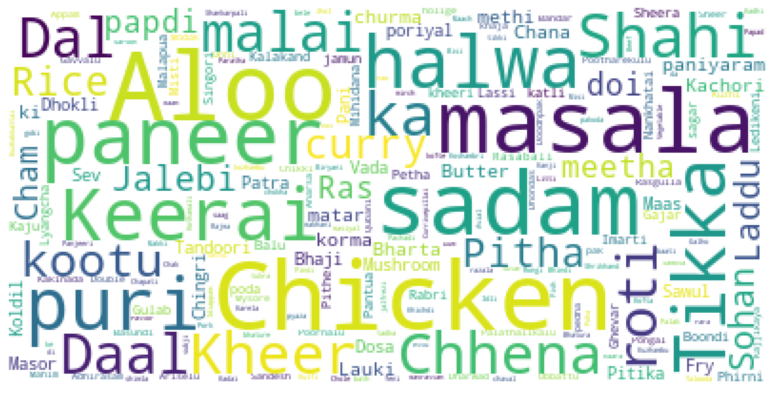

In [ ]:
wordCloud = WordCloud(
    background_color='White',
    max_font_size = 50).generate(' '.join(df['name']))
plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()


To plot the Pie charts and bars lets define the functions...
* Here I have given a few color options...
    * You can do it with default colors...

In [ ]:
def plot_graph(value, name, title, color, category) : 
    new_df = df[name].value_counts().reset_index()
    new_df.columns = [value, 'Total']
    if color == 'RdBu' : 
        if category == 'pie' : 
            fig = px.pie(new_df, values= 'Total', names = value, title = title,
                         color_discrete_sequence=px.colors.sequential.RdBu)
            return fig.show()
        elif category == 'bar' : 
            fig = px.bar(new_df, y= 'Total', x = value, title = title,
                         color_discrete_sequence=px.colors.sequential.RdBu)
            return fig.show()
    elif color == 'Rainbow' : 
        if category == 'pie' : 
            fig = px.pie(new_df, values= 'Total', names = value, title = title,
                         color_discrete_sequence=px.colors.sequential.Rainbow)
            return fig.show()
        elif category == 'bar' : 
            fig = px.bar(new_df, y= 'Total', x = value, title = title,
                         color_discrete_sequence=px.colors.sequential.Rainbow)
            return fig.show()
    else : 
        if category == 'pie' : 
            fig = px.pie(new_df, values= 'Total', names = value, title = title)
            return fig.show()
        elif category == 'bar' : 
            fig = px.bar(new_df, y= 'Total', x = value, title = title)
            return fig.show()

## Proportion of Vegetarian and Non-Vegetarian dishes <a class="anchor" id="chapter5"></a>

In [ ]:
plot_graph('Diet','diet', 'Proportion of Vegetarian and Non-Vegetarian dishes', None, 'pie')

## Proportion of States <a class="anchor" id="chapter6"></a>

In [ ]:
plot_graph('State','state', 'Proportion of States', 'Rainbow', 'pie')

## Proportion of Flavours <a class="anchor" id="chapter7"></a>

In [ ]:
plot_graph('Flavor','flavor_profile', 'Proportion of Flavours', None, 'bar')

## Region wise no of foods <a class="anchor" id="chapter8"></a>

In [ ]:
plot_graph('Region','region', 'Region wise no of foods', 'RdBu', 'pie')

## Region wise plots : <a class="anchor" id="chapter33"></a>

In [ ]:
def region_plots(name, title, color) : 
    region_df = pd.pivot_table(df, index = ['region',name],aggfunc = np.sum)
    region_df.reset_index(inplace = True)
    if color == 'RdBu' :
        fig = px.bar(region_df, x ='region' , y='cook_time' , color= name,barmode = 'group', title = title,
                 color_discrete_sequence = px.colors.sequential.RdBu)
    elif color == 'Rainbow' : 
        fig = px.bar(region_df, x ='region' , y='cook_time' , color= name,barmode = 'group', title = title,
                 color_discrete_sequence = px.colors.sequential.Rainbow)
    else : 
        fig = px.bar(region_df, x ='region' , y='cook_time' , color= name,barmode = 'group', title = title)
    fig.update_layout(title_text= title,template='plotly',title_x=0.5)
    return fig.show()

## No of courses around different rigions <a class="anchor" id="chapter30"></a>

In [ ]:
region_plots('course','No of courses around different rigions','RdBu')

## No of flavors around different rigions <a class="anchor" id="chapter31"></a>

In [ ]:
region_plots('flavor_profile','No of flavors around different rigions','Rainbow')

## No of veg and non veg dishes around different rigions <a class="anchor" id="chapter32"></a>

In [ ]:
region_plots('diet','No of veg and non veg dishes around different rigions',None)

## Preparation Time <a class="anchor" id="chapter9"></a>

In [ ]:
plot_graph('Cook Time','cook_time', 'Preparation Time', None, 'pie')

Now we try to find the states with maximum no of available dishes...
* I have selected the top 5 states here...

In [ ]:
df_ = df[['state','name']]
df_ = df.groupby('state').count()
df_.reset_index(inplace = True)
df_.sort_values(by = 'name', ascending = False, inplace = True)
df_.head(5)

,state,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,region,total_ingredients
5,Gujarat,35,35,35,35,35,35,35,35,35
16,Punjab,32,32,32,32,32,32,32,32,32
11,Maharashtra,30,30,30,30,30,30,30,30,30
24,unknown,24,24,24,24,24,24,24,24,24
23,West Bengal,24,24,24,24,24,24,24,24,24


### State Word Art <a class="anchor" id="chapter10"></a>

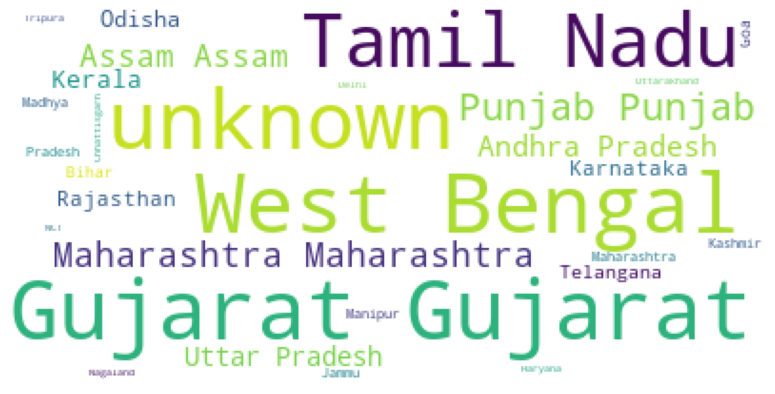

In [ ]:
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 50).generate(' '.join(df['state']))
plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()


Now we try to plot the infographs of the states :

The Infographs will include 4 specific informations...

1. Total available dishes 
2. Pie chart representing veg and non veg dishes 
3. Bar chart of the course 
4. And their preparation time 

Here again I have defined a function to plot the infograph

In [ ]:
def state_infograph(statename, title) : 
    new_df = df[df['state']== statename]

    total_dishes = new_df.shape[0]

    course_df = new_df['course'].value_counts().reset_index()
    course_df.columns = ['course','num']

    diet_df = new_df['diet'].value_counts().reset_index()
    diet_df.columns = ['diet','num']
    
#     flavor_df = new_df['prep_time'].value_counts().reset_index()
#     flavor_df.columns = ['Flavor','num']

    prep_time_df = new_df['prep_time'].value_counts().reset_index()
    prep_time_df.columns = ['prep_time', 'num']

    fig = make_subplots(
        rows=2, cols=3,subplot_titles=('Total Dishes','Dishes by Courses','Dishes by Preparation time', '',''),
        specs=[[{'type': 'indicator'},{'type': 'bar','rowspan': 2},{'type': 'bar','rowspan': 2}],
              [ {'type': 'pie'} , {'type': 'pie'}, {'type': 'pie'}]])

    fig.add_trace(go.Indicator(
        mode = 'number',
        value = int(total_dishes),
        number={'font':{'color': '#270082','size':50}},
    ),row=1, col=1)


    fig.add_trace(go.Bar(x=course_df['course'],y=course_df['num'], marker={'color': 'blue'}, 
                         text=course_df['num'],name='dishes by courses',textposition ='auto'),row=1, col=2)

    fig.add_trace(go.Pie(labels=diet_df['diet'], values=diet_df['num'],textinfo='percent',
                         marker= dict(colors=['#00bd0d','#fc0303'])),row=2, col=1)

    fig.add_trace(go.Bar(
        x=prep_time_df['prep_time'],y=course_df['num'],marker={'color': '#fc0335'}, text=course_df['num'],
        name='flavors by courses',textposition ='auto'),row=1, col=3)

    fig.update_layout(title_text= title,template='plotly',title_x=0.5)

    return fig.show()

## Gujrat Infograph <a class="anchor" id="chapter11"></a>

In [ ]:
state_infograph('Gujarat', 'Gujarat food infograph')

## Pujab Infograph <a class="anchor" id="chapter12"></a>

In [ ]:
state_infograph('Punjab', 'Punjab food infograph')

## Maharashtra Infograph <a class="anchor" id="chapter13"></a>

In [ ]:
state_infograph('Maharashtra', 'Maharashtra food infograph')

## Unknown State Infograph <a class="anchor" id="chapter14"></a>

In [ ]:
state_infograph('unknown', 'unknown state food infograph')

## West Bengal Infograph <a class="anchor" id="chapter15"></a>

In [ ]:
state_infograph('West Bengal', 'West Bengal food infograph')

# Let's do something with seaborn...

In [ ]:
def size(m,n):
    fig = plt.gcf();
    fig.set_size_inches(m,n);
def bar_plot(type_,name, color, title, ylabel) : 
    new_df = df[df.course == type_]
    new_df = new_df.sort_values(by = name)    
    if color == 'viridis' : 
        plot = sns.barplot(x = 'name', y = name, data = new_df.tail(10), palette ='viridis');
        plt.ylabel(ylabel);
        plt.xticks(rotation = 80)
        plt.title(title);
    elif color == 'mako' :
        plot = sns.barplot(x = 'name', y = name, data = new_df.tail(10), palette ='mako');
        plt.ylabel(ylabel);
        plt.xticks(rotation = 80)
        plt.title(title);
    else : 
        plot = sns.barplot(x = 'name', y = name, data = new_df.tail(10));
        plt.ylabel(ylabel);
        plt.xticks(rotation = 80)
        plt.title(title);
    return plot
def bar_plot_plotly(type_,name,color,title) : 
    new_df_plotly = df[df.course == type_]
    new_df_plotly = new_df_plotly.sort_values(by = name)     
    if color == 'Viridis_r' :
        fig = px.bar(new_df_plotly.tail(10),x = 'name', y = name, color = 'name',
                 color_discrete_sequence= px.colors.sequential.Viridis_r,title = title);
    elif color == 'Plasma_r' : 
        fig = px.bar(new_df_plotly.tail(10),x = 'name', y = name, color = 'name',
                 color_discrete_sequence= px.colors.sequential.Plasma_r,title = title);
    elif color == 'matter_r' : 
        fig = px.bar(new_df_plotly.tail(10),x = 'name', y = name, color = 'name',
                 color_discrete_sequence= px.colors.sequential.matter_r,title = title);
    else : 
        fig = px.bar(new_df_plotly.tail(10),x = 'name', y = name, color = 'name',title = title);
    return fig.show()
#     return new_df_plotly.tail(10)

## Top 10 snacks with longest Preparation time <a class="anchor" id="chapter16"></a>

In [ ]:
bar_plot_plotly('snack','prep_time','Viridis_r', 'Top 10 snacks with longest Preparation time')

## Snak Wort Art <a class="anchor" id="chapter17"></a>

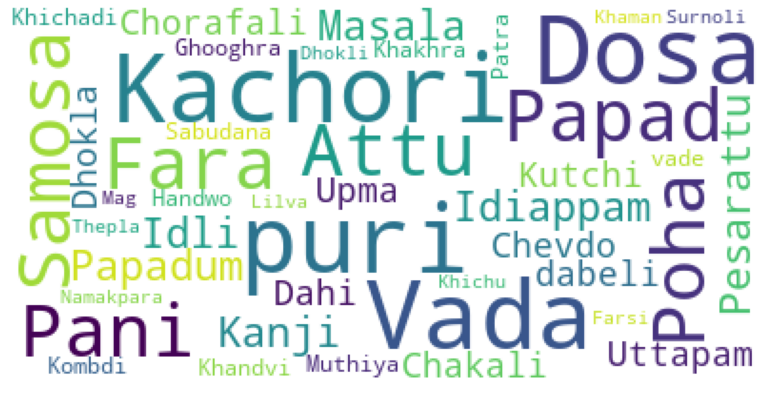

In [ ]:
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 50).generate(' '.join(df[df.course == 'snack'].name))
plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()


## Top 10 Desserts with longest Preparation time <a class="anchor" id="chapter18"></a>

In [ ]:
bar_plot_plotly('dessert','prep_time', 'Plasma_r', 'Top 10 Desserts with longest Preparation time')

## Dessert Word Art <a class="anchor" id="chapter19"></a>

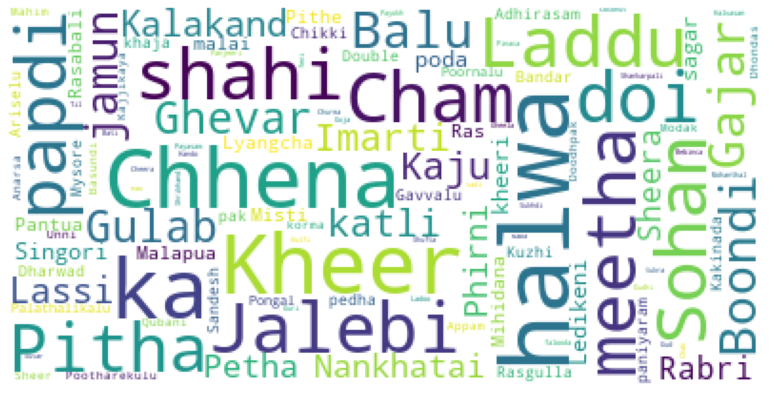

In [ ]:
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 50).generate(' '.join(df[df.course == 'dessert'].name))
plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()


## Main course Preparation time <a class="anchor" id="chapter20"></a>

In [ ]:
bar_plot_plotly('starter','prep_time', None, 'Main course Preparation time')

## Top 10 Main Course with longest Preparation time <a class="anchor" id="chapter21"></a>

In [ ]:
bar_plot_plotly('main course','prep_time', 'matter_r', 'Top 10 Main course with longest Preparation time')

## Main course Word Art <a class="anchor" id="chapter22"></a>

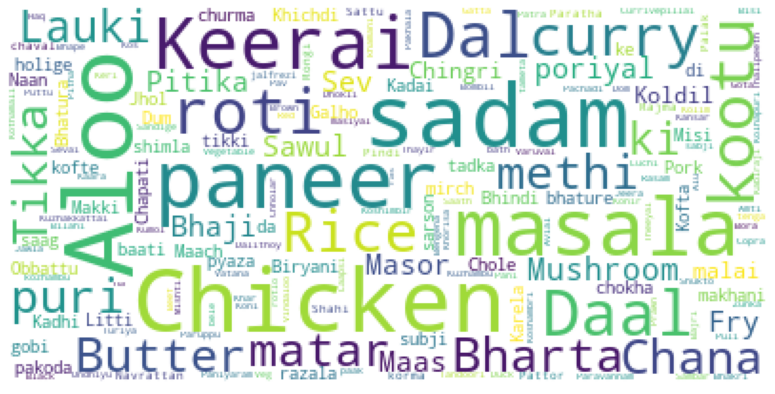

In [ ]:
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 50).generate(' '.join(df[df.course == 'main course'].name))
plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()


## Total ingredient Count <a class="anchor" id="chapter23"></a>

In [ ]:
ingredient_df = df.total_ingredients.value_counts().reset_index()
ingredient_df.columns = ['Ingredient Count', 'Total Dishes']
fig = px.bar(ingredient_df, y= 'Total Dishes', x = 'Ingredient Count',title = '', color_discrete_sequence = ['#0569ff'])
fig.show()

## Top 50 most used ingredient <a class="anchor" id="chapter24"></a>

In [ ]:
ingredient_dict = {}
ingredient_list = []
for i in range(len(df)) : 
    ingredients = df.ingredients[i].split(sep = ',')
    for j in range(len(ingredients)) : 
        ingredient_list.append(ingredients[j])
for i in ingredient_list : 
    count = ingredient_list.count(i)
    ingredient_dict[i] = count
ingredient_dict

{'  jaggery': 1,
 ' Dharwadi buffalo milk': 1,
 ' Sugar': 1,
 ' all purpose flour': 7,
 ' almond': 1,
 ' almonds': 3,
 ' aloo': 1,
 ' alum powder': 1,
 ' amchur powder': 2,
 ' arhar dal': 3,
 ' arrowroot powder': 1,
 ' atta': 1,
 ' avocado oil': 2,
 ' axone': 1,
 ' baby potatoes': 1,
 ' badam': 2,
 ' baking powder': 2,
 ' baking soda': 7,
 ' banana': 3,
 ' basmati rice': 1,
 ' bay leaf': 4,
 ' beans': 3,
 ' beetroot': 1,
 ' bell pepper': 1,
 ' bell peppers': 1,
 ' bengal gram flour': 7,
 ' besan': 3,
 ' bhatura': 1,
 ' bhuna chana': 1,
 ' biryani masala powder': 1,
 ' bitter gourd': 1,
 ' black pepper': 5,
 ' black salt': 2,
 ' black sesame seeds': 2,
 ' blend rice': 1,
 ' boiled potatoes': 1,
 ' bombay rava': 1,
 ' boondi': 1,
 ' bread crumbs': 1,
 ' brinjal': 1,
 ' butter': 7,
 ' cabbage': 2,
 ' capsicum': 1,
 ' cardamom': 9,
 ' cardamom pods': 1,
 ' cardamom powder': 1,
 ' carrot': 3,
 ' cashew nuts': 6,
 ' cashews': 4,
 ' cashews and raisins': 1,
 ' chana daal': 1,
 ' chana dal': 5

In [ ]:
ingredients_df = pd.DataFrame.from_dict(ingredient_dict, orient = 'index')
ingredients_df.columns = ['count']
ingredients_df.sort_values(by = 'count', ascending = False, inplace = True)

In [ ]:
fig = px.bar(ingredients_df.head(50), y= 'count',title = 'Top 50 most used ingredient', color_discrete_sequence = ['#7b32a8'],
            labels = {'index': 'Ingredients', 'count' : 'Used in No of dishes'})
fig.show()

## Ingredient count in dishes <a class="anchor" id="chapter27"></a>

In [ ]:
fig = px.scatter(df, x = 'name', y ='total_ingredients', color='total_ingredients')
fig.update_layout(title={'text': "Ingredient count in dishes",'y':0.95,'x':0.5},
                 xaxis_title = ' Name of the dishes',
                 yaxis_title = 'Total ingredients')
fig.show()

## Time and total ingredient 3D <a class="anchor" id="chapter25"></a>

In [ ]:
fig = px.scatter_3d(df, x='prep_time', y='cook_time', z='total_ingredients',
                    color='state',
                    hover_data=['name'],
                    opacity=0.5)
fig.update_layout(title='Time and total ingredient 3D')
fig.show()

## Corelation Heatmap <a class="anchor" id="chapter26"></a>

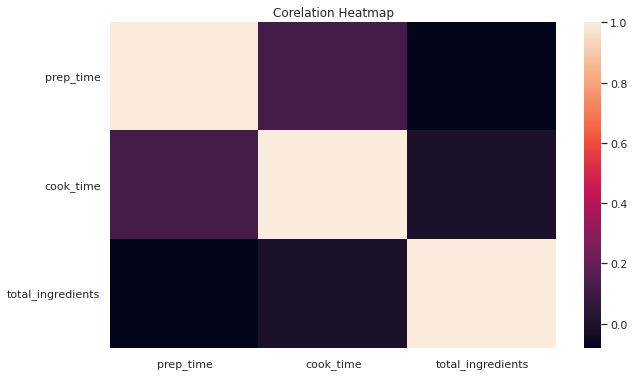

In [ ]:
sns.heatmap(df.corr())
plt.title('Corelation Heatmap')
plt.yticks(rotation = 0)
size(10,6)

If you like the presentation then do upvote...
That will be very kind and inspiring...

# Thank You!!!